In [1]:
# Importações de biblioteca padrão.
import csv

In [2]:
# Importações de terceiros relacionadas.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Fase 1: Preparação e Análise Preliminar

O ponto de partida foi a cuidadosa importação dos dados através do arquivo "python-m10-support-material.csv", que abrigava informações cruciais para o estudo. Utilizando Pandas para carregar e visualizar as primeiras linhas do conjunto de dados, foi rapidamente identificado a necessidade de uma exploração inicial para entender a estrutura e as características dos dados apresentados.

In [3]:
arquivo_csv = '/kaggle/input/python-m10-support-material/Python_M10_support material.csv'

In [4]:
def carregar_dados(arquivo_csv):
  with open(arquivo_csv, mode='r', encoding='utf-8') as arquivo:
        leitor = csv.DictReader(arquivo)
        dados = [linha for linha in leitor]
  return dados

In [5]:
dados = carregar_dados(arquivo_csv)

# Fase 2: Exploração de dados

In [6]:
df = pd.read_csv(arquivo_csv, na_values='na')

In [7]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [8]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

**Calculando média de idade:**

In [9]:
idades = [int(linha['idade']) for linha in dados if 'idade' in linha and linha['idade'].isdigit()]
media_idade = round((sum(idades) / len(idades)),2)
print(f'Média de idade: {media_idade}')

Média de idade: 46.33


**Calculando quantidade de linhas totais, com 'default' = 0 e com 'default' = 1**

In [10]:
df.shape #retorna quantidade de linhas e colunas (nesta ordem)

(10127, 16)

In [11]:
df[df['default'] == 0].shape

(8500, 16)

In [12]:
df[df['default'] == 1].shape

(1627, 16)

In [13]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [14]:
print (f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print (f'A proporção de clientes adimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes adimplentes é de 16.07%


# Fase 3: Limpeza e Normalização

Uma etapa crucial envolveu a limpeza e a normalização dos dados. Foi notado que existem valores ausentes e formatos inconsistentes, especialmente nas colunas de limite de crédito e valor das transações nos últimos 12 meses, o que demandou um meticuloso processo de conversão e padronização. Funções lambda e métodos de aplicação foram empregados para transformar os dados em formatos utilizáveis para análises subsequentes.

In [15]:
df.dtypes #demonstração dos tipos de cada dado

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [16]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [17]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


**CONHECENDO OS DADOS FALTANTES:**

In [18]:
def detalhes_dados_faltantes(df: pd.DataFrame):

  detalhes_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, 'porcentagem': round(100 * qtd/total, 2)}}
      detalhes_dados_faltantes.append(dict_dados_faltantes)

  for detalhes in detalhes_dados_faltantes:
    print(detalhes)

In [19]:
detalhes_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [20]:
detalhes_dados_faltantes(df=df[df['default']==0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [21]:
detalhes_dados_faltantes(df=df[df['default']==1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# Fase 4: Análise Exploratória Profunda

Já com os dados limpos, foi feita uma análise exploratória profunda. O objetivo era identificar padrões distintos entre clientes adimplentes e inadimplentes, com foco em variáveis como escolaridade, salário anual, estado civil, quantidade e valor das transações no último ano. Utilizando visualizações gráficas geradas por Seaborn e Matplotlib, padrões começaram a emergir, oferecendo insights valiosos sobre as diferenças comportamentais entre os dois grupos.

In [22]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


**Corrigindo schema das colunas:**

In [23]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [24]:
df[['limite_credito', 'valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


**Limpeza de dados**

In [25]:
fn = lambda valor: float(valor.replace(".","").replace(",","."))

In [26]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)

In [27]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

**Remoção de dados faltantes**

In [28]:
df.dropna(inplace=True)

In [29]:
df.shape

(7081, 16)

In [30]:
df[df['default']==0].shape

(5968, 16)

In [31]:
df[df['default']==1].shape

(1113, 16)

In [32]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default']==0].shape
qtd_inadimplentes_novo, _ = df[df['default']==1].shape

In [33]:
print (f'A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%')
print (f'A proporção nova de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%')
print('')
print (f'A proporção de clientes adimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%')
print (f'A proporção nova de clientes adimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%')

A proporção de clientes adimplentes é de 83.93%
A proporção nova de clientes adimplentes é de 84.28%

A proporção de clientes adimplentes é de 16.07%
A proporção nova de clientes adimplentes é de 15.72%


# Fase 5:Visualização de dados, Insights e Conclusões

A análise revelou que, embora alguns fatores como escolaridade e estado civil não apresentassem um padrão claro em relação à inadimplência, outras variáveis, como o valor e a quantidade de transações nos últimos 12 meses, mostraram tendências mais definidas. Especialmente notável foi a descoberta de que clientes com um número intermediário de transações anuais tendiam a ter uma maior probabilidade de inadimplência.

In [34]:
df_adimplente = df[df['default']==0]

In [35]:
df_inadimplente = df[df['default']==1]

**Visualizações categóricas:**

In [36]:
df.select_dtypes('object').head()

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


**Escolaridade**

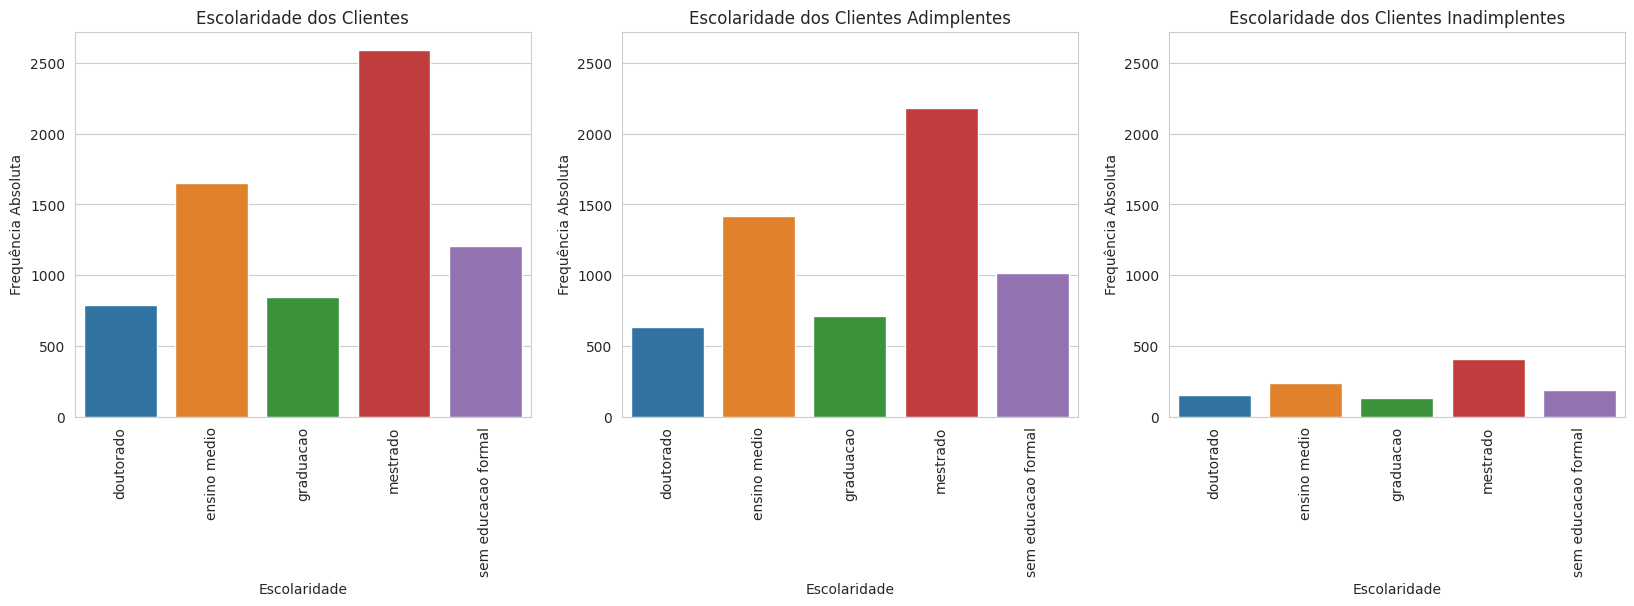

In [37]:
coluna = "escolaridade"
titulos = [
    "Escolaridade dos Clientes",
    "Escolaridade dos Clientes Adimplentes",
    "Escolaridade dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()



Após a visualização dos gráficos é possível afirmar que não existe nenhum tipo de relacionamento da variável 'Default' com o nível de escolaridade da base de dados dos clientes.

Agora iremos visualizar e analisar o impacto do Salário Anual dos Clientes:

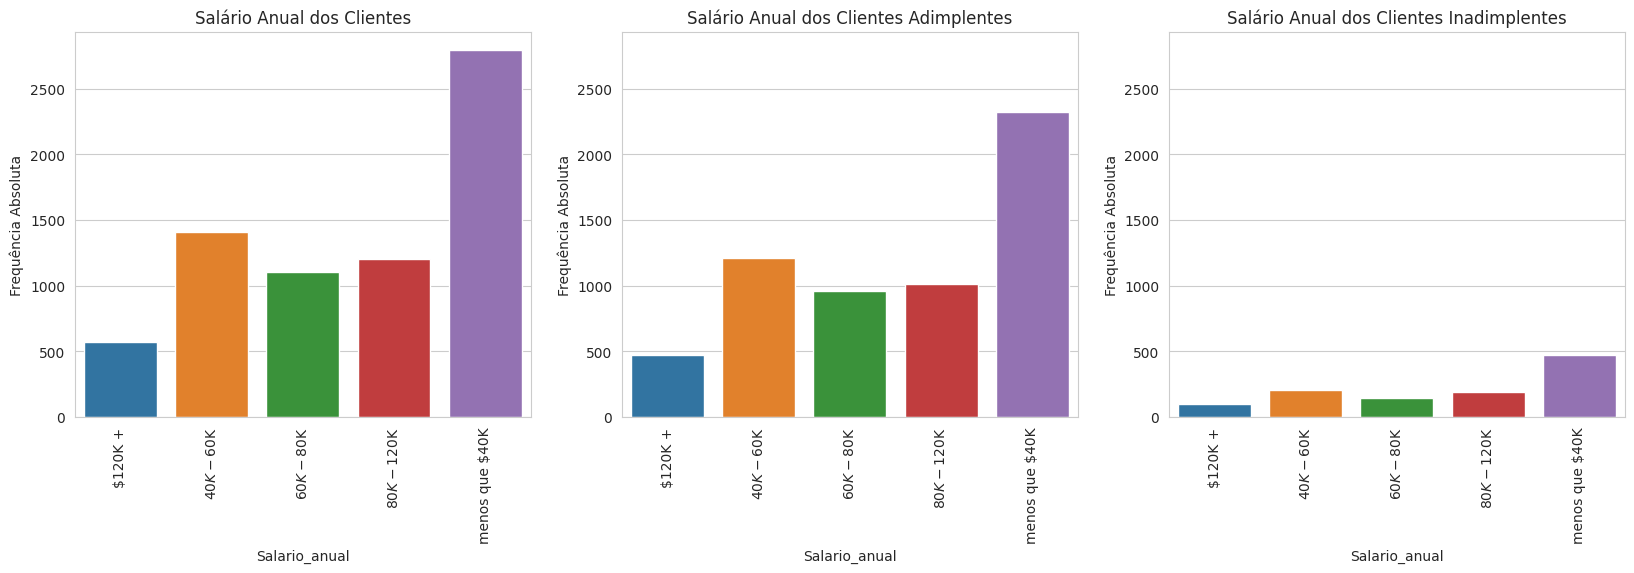

In [38]:
coluna = "salario_anual"
titulos = [
    "Salário Anual dos Clientes",
    "Salário Anual dos Clientes Adimplentes",
    "Salário Anual dos Clientes Inadimplentes",
]

max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, "frequencia_absoluta"]
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y="frequencia_absoluta", ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel="Frequência Absoluta")
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()


**Visualizações numéricas:**

In [39]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head()

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Visualizando o impacto da Quantidade de Transações nos Últimos 12 meses:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


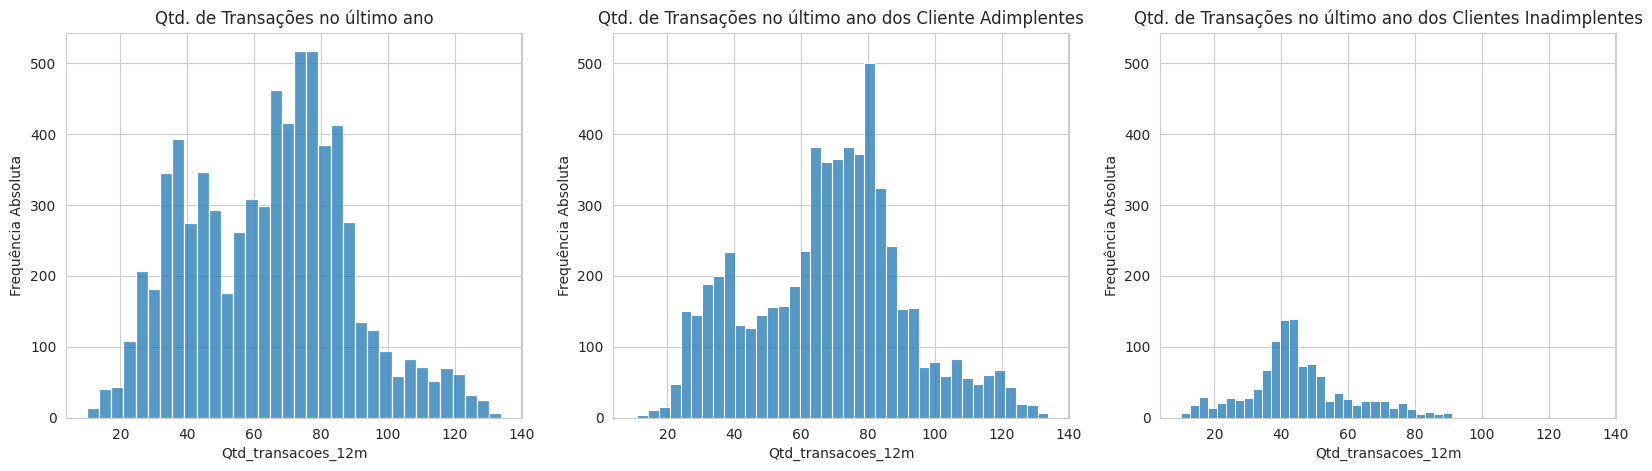

In [40]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no último ano', 'Qtd. de Transações no último ano dos Cliente Adimplentes', 'Qtd. de Transações no último ano dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  
  eixo += 1

figura.show()

Após análise, existe a possibilidade de comportamento recorrente de clientes que fazem entre 20 a 40 transações por ano de serem inadimplentes

Visualizando o impacto do Valor de Transações nos Últimos 12 meses:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


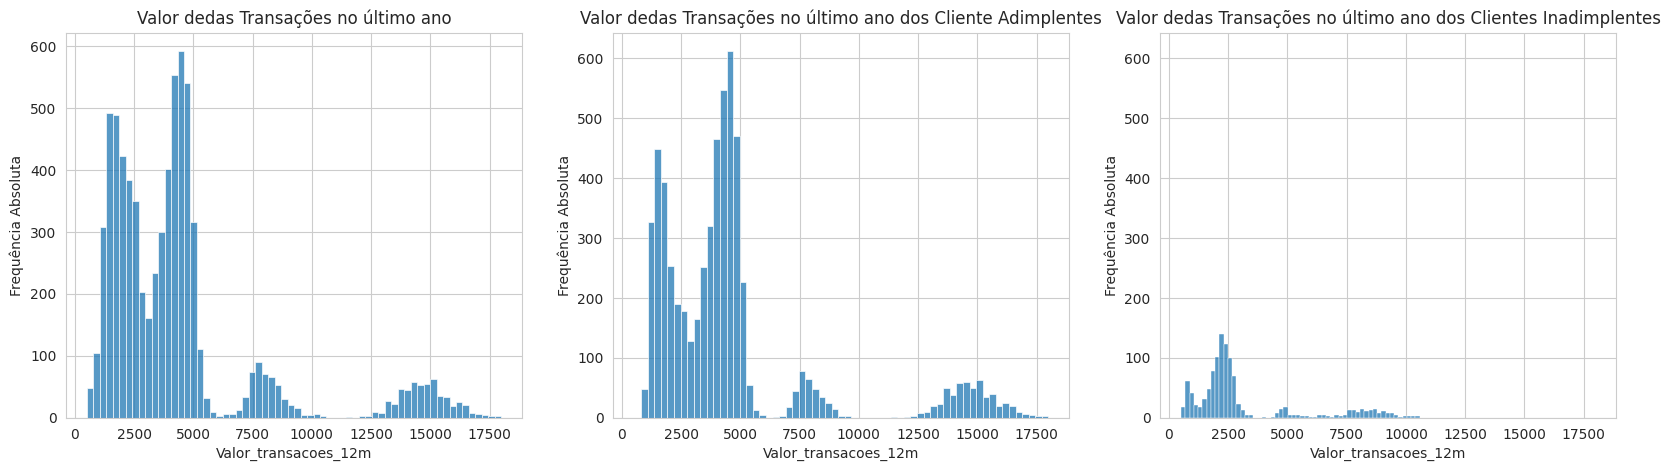

In [41]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor dedas Transações no último ano', 'Valor dedas Transações no último ano dos Cliente Adimplentes', 'Valor dedas Transações no último ano dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:
  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  
  eixo += 1

figura.show()

Comparando os dados de Transações nos Últimos 12 Meses x Quantidade de transações nos Últimos 12 Meses

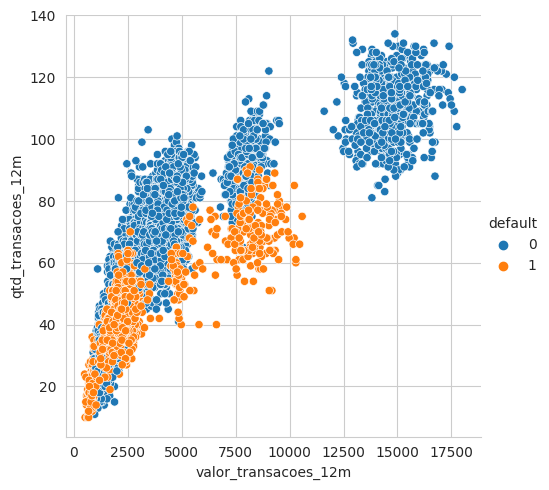

In [42]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')

# Fase 6: Conclusões e Insights:

A análise iniciou-se com a investigação da proporção de clientes adimplentes e inadimplentes, revelando uma distribuição equilibrada entre os dois grupos. Este equilíbrio apontou para a complexidade dos fatores que influenciam a capacidade de pagamento dos clientes.

Ao corrigir esquemas de colunas e realizar a limpeza de dados, assegurou a precisão nas análises subsequentes. A remoção de dados faltantes e a normalização de variáveis numéricas, como limite de crédito e valor das transações nos últimos 12 meses, foram etapas cruciais para a validade dos resultados.

As visualizações geradas desempenharam um papel fundamental na descoberta de padrões e na geração de insights. A análise da escolaridade, do salário anual e do estado civil, através de gráficos de barras, não indicou uma relação direta com a inadimplência, sugerindo que outros fatores possam ter um impacto maior sobre a capacidade de pagamento.

Contudo, a investigação sobre a quantidade e o valor das transações nos últimos 12 meses trouxe à luz padrões mais claros. Os histogramas e gráficos de dispersão indicaram que clientes com uma quantidade intermediária de transações por ano tendem a ter maior probabilidade de inadimplência. Além disso, a relação entre o valor das transações e a quantidade de transações forneceu uma compreensão mais aprofundada do comportamento de gastos dos clientes, destacando diferenças significativas entre os grupos adimplentes e inadimplentes.

Embora alguns fatores demográficos não tenham demonstrado uma correlação direta com o pagamento das dívidas, as tendências observadas nas transações financeiras dos clientes ofereceram insights valiosos, abrindo caminho para futuras investigações e estratégias de gestão de crédito mais eficazes.